# Deep Neural Network in Keras

In this notebook, we improve on our [intermediate neural net](https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/intermediate_net_in_keras.ipynb) by applying the theory we've covered since.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/deep_net_in_keras.ipynb)

#### Load dependencies

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout # new!
from keras.layers.normalization import BatchNormalization # new!
from keras.optimizers import SGD

from tensorflow.keras.utils import to_categorical

#### Load data

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

#### Preprocess data

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
X_train /= 255
X_valid /= 255

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

#### Design neural network architecture

__Experiment, Experiment, Experiment!__

- Which changes have a substantial impact on model accuracy or training efficiency?
  - An additional hidden layer
  - The addition of batch normalization
  - The addition of dropout
- What is the impact of adding yet more hidden layers?
- What is the impact of increasing the proportion of neurons dropped out in the final hidden layer, or of adding dropout to earlier hidden layers?
- What is the impact of choosing another optimizer, such as AdaGrad?

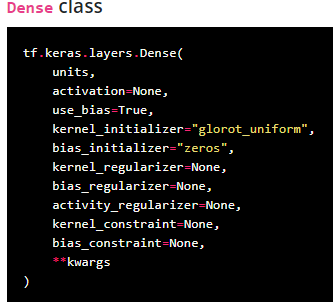

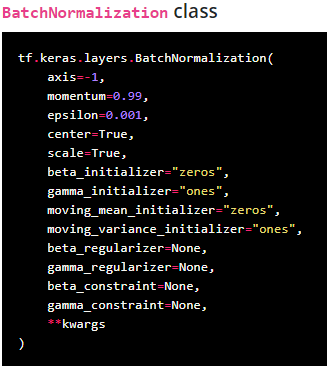

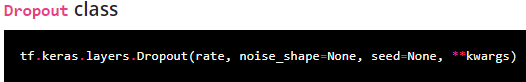

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

#### Configure model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train!

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))